In [1]:
import pandas as pd
import sys
import os
import numpy as np
import plotly.graph_objects as go

sys.path.append("../")

In [2]:
# file_location = os.environ.get('SQL_DATA_DIR')
file_location = r'Z:\6 ACTION Project\SUMO\research_data_extended'
day = '2020-02-13.csv'

In [3]:
df = pd.read_csv(os.path.join(file_location, day))

In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', drop=False, inplace=True)
df.drop('Unnamed: 0', inplace=True, axis=1)

In [5]:
filtered_df = df[(df['Timestamp'] > pd.to_datetime('2020-02-13 17:00:00')) & (df['Timestamp'] < pd.to_datetime('2020-02-13 17:10:00'))]

In [6]:
light_on = filtered_df[(filtered_df['EventCode'] == 1) | (filtered_df['EventCode'] == 10)]

In [7]:
detection_events = filtered_df[(filtered_df['EventCode'] == 81)].copy()

In [12]:
detection_dict = {}
for tl in detection_events['SignalID'].unique():
    print(tl)
    detection_dict[tl] = {}
    local_df = detection_events[detection_events['SignalID'] == tl].copy()
    for detector in local_df['EventParam'].unique():
        loop_df = local_df[local_df['EventParam'] == detector].copy()
        loop_df['headway'] = loop_df['Timestamp'].diff()
        loop_df['headway_seconds'] = loop_df['headway'].dt.seconds + loop_df['headway'].dt.microseconds / 1e6
        detection_dict[tl][detector] = loop_df.copy()
        del loop_df
    del local_df

63069007
63069009
63069006
63069008


2020-02-13T17:01:28.700000000 10
2020-02-13T17:02:37.600000000 1
2020-02-13T17:04:28.800000000 10
2020-02-13T17:05:31.000000000 1
2020-02-13T17:07:28.800000000 10
2020-02-13T17:08:42.700000000 1


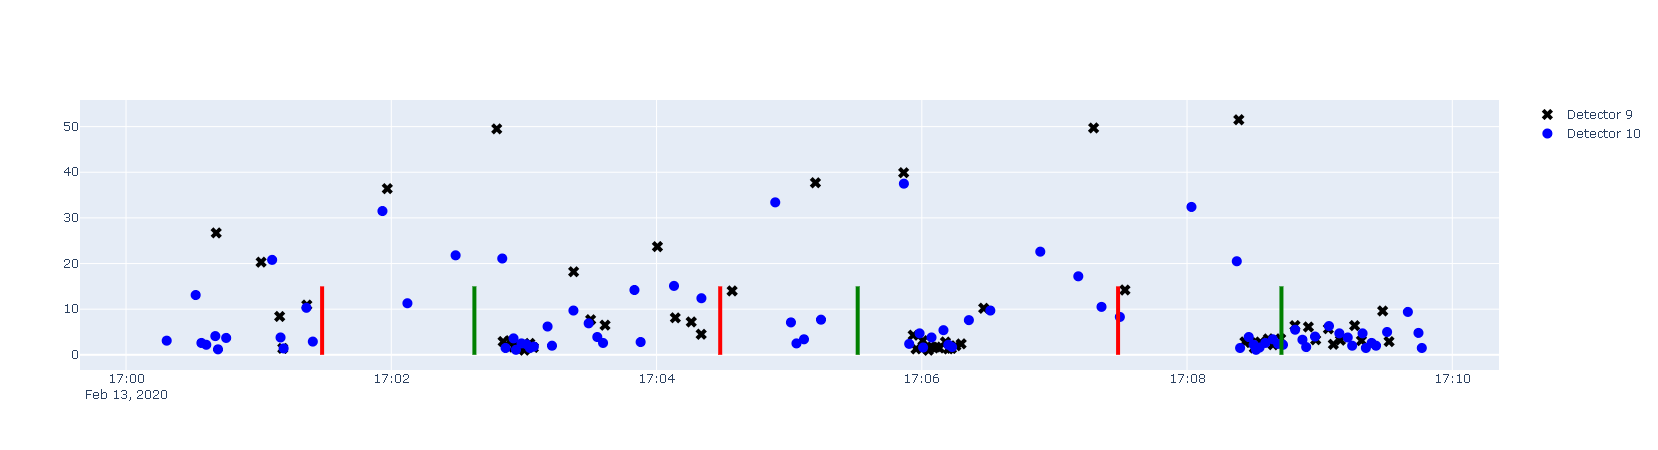

In [14]:
tl_id = 63069007
phase = 2

plot_tl_df = light_on[(light_on['SignalID'] == tl_id) & (light_on['EventParam'] == phase)]

fig = go.Figure()

# fig.update_xaxes(range=[plot_detect_df['Timestamp'].min(), plot_detect_df['Timestamp'].max()])

fig.add_trace(go.Scatter(x=detection_dict[tl_id][9]['Timestamp'],
                        y=detection_dict[tl_id][9]['headway_seconds'],
                        mode='markers',
                         name='Detector 9',
                        marker=dict(
                            color='black',
                            size=10,
                            symbol='x'
                        ),
                        )
             )

fig.add_trace(go.Scatter(x=detection_dict[tl_id][10]['Timestamp'],
                        y=detection_dict[tl_id][10]['headway_seconds'],
                        mode='markers',
                         name='Detector 10',
                        marker=dict(
                            color='blue',
                            size=10,
                            symbol='circle'
                        ),
                        )
             )


for i, code in zip(plot_tl_df['Timestamp'].values, plot_tl_df['EventCode'].values):
    print(i, code)
    fig.add_trace(go.Scatter(x=[pd.to_datetime(i), pd.to_datetime(i)],
                             y = [0, 15],
                             showlegend=False,
                             mode='lines',
                                line=dict(
                                    color="Green" if code == 1 else 'Red',
                                    width=4,
                                    dash="solid",
                                )
                            )
                )
    
# fig.update_shapes(dict(xref='x', yref='y'))
fig.show()

In [10]:
# detection_dict[tl_id][10].where('Timestamp' > )